
# Classification of  hand-written digits using scikit-learn


An example showing how we can classify hand-written digits using scikit-learn. 
The example is adapted from 

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html



Import required python packages

In [2]:
from sklearn import datasets, svm, metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np


Load the dataset

In [66]:
digits = datasets.load_digits()

Print the dataset. The dataset consists of two main parts:
1. digits.data is the input (flattened pixel values for each handwritten image)

2. digits.target is the output (ground-truth labels)


In [4]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

We can obtain the number of data points using .shape command 

In [5]:
digits.data.shape

(1797, 64)

plot the digits.data with associated labels

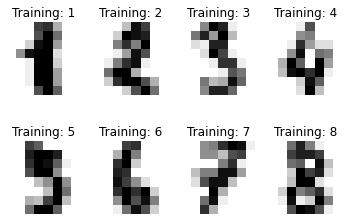

In [6]:
fig = plt.figure()
for index in range(8):
    plt.subplot(2, 4, index+1)
    plt.axis('off')
    plt.imshow(digits.data[index+1,:].reshape(8,8),cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % digits.target[index+1])

Pixel values will be the input (X) and labels will be the output (y)

In [7]:
X = digits.data
y= digits.target

Split data into train and test subsets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True)

Import different classifiers

In [60]:
# Multinomial Naive Bayes Classifier  
def naive_bayes_classifier(train_x, train_y):   
    model = MultinomialNB(alpha=0.01)  
    model.fit(train_x, train_y)  
    return model  
  
  
# KNN Classifier  
def knn_classifier(train_x, train_y):   
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(train_x, train_y)  
    return model  
  
  
# Logistic Regression Classifier  
def logistic_regression_classifier(train_x, train_y):    
    model = LogisticRegression(penalty='l2')  
    model.fit(train_x, train_y)  
    return model  
  
  
# Random Forest Classifier  
def random_forest_classifier(train_x, train_y):    
    model = RandomForestClassifier(n_estimators=50)  
    model.fit(train_x, train_y)  
    return model  
  
  

  
# GBDT(Gradient Boosting Decision Tree) Classifier  
def gradient_boosting_classifier(train_x, train_y):   
    model = GradientBoostingClassifier(n_estimators=200)  
    model.fit(train_x, train_y)  
    return model  
  
  
# SVM Classifier  
def svm_classifier(train_x, train_y):    
    model = SVC(kernel='rbf', probability=True)  
    model.fit(train_x, train_y)  
    return model  
  
# MLP Classifier
def mlp_classifier(train_x,train_y):
    model =  MLPClassifier(hidden_layer_sizes=(100,), max_iter=15, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
    model.fit(train_x,train_y)
    return model

Choose a classifier:

In [61]:
model = knn_classifier(X_train, y_train) # svm_classifier was the default classifier

Now predict the value of the digit of the test dataset

In [62]:
predicted = model.predict(X_test)

Compute the prediction accuracy

In [64]:
accuracy = metrics.accuracy_score(y_test, predicted)  
print ('classification accuracy : %.2f%%' % (100 * accuracy))

classification accuracy : 99.44%


plot test data with predicted labels

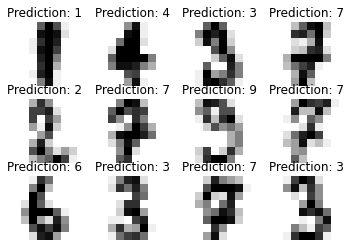

In [65]:
fig = plt.figure()
for index in range(12):
    plt.subplot(3, 4, index+1)
    plt.axis('off')
    plt.imshow(X_test[index+1,:].reshape(8,8),cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % predicted[index+1])

We want to know the classification accuracy for each number. We can use a for loop to do it

In [25]:
#assign an empty list
num_acc = []

In [26]:
for i in range (10):
    #find the index of each number (0 to 9) in the label
    idx = np.where(y_test == i)
    num_acc.append(metrics.accuracy_score(y_test[idx], predicted[idx]))

We can print each line in the above loop to see what is going on

In [27]:
#find the index of number 9 in the label
idx = np.where(y_test == 9)

In [28]:
y_test[idx]

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9])

In [30]:
predicted[idx]

array([9, 9, 9, 5, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9])

In [31]:
#compute the accuracy between ground truth and ml predicted label
metrics.accuracy_score(y_test[idx], predicted[idx])

0.9803921568627451

In [33]:
num_acc

[1.0,
 1.0,
 1.0,
 1.0,
 0.9821428571428571,
 0.9649122807017544,
 1.0,
 1.0,
 1.0,
 0.9803921568627451]

Plot the prediction accuracy for each label (0 to 9)

Text(0, 0.5, 'prediction accuracy')

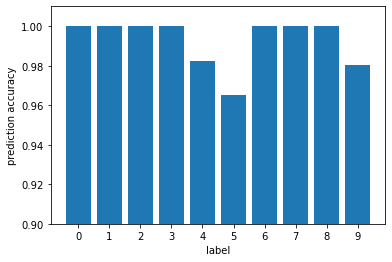

In [34]:
plt.bar(np.arange(0,10,1),num_acc)
plt.ylim(0.9,1.01)
plt.xticks(np.arange(0,10,1))
plt.xlabel ('label')
plt.ylabel('prediction accuracy')

### Imbalanced dataset

Now we want to explore how an imbalanced dataset will impact on the classification accuracy. The previous dataset we have is pretty balanced. We can use a histogram to visualize the frequency for each label

Text(0, 0.5, 'frequency')

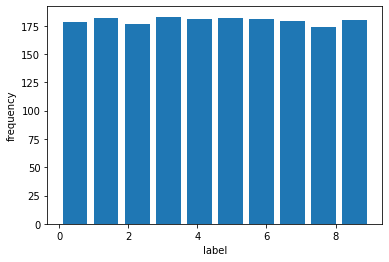

In [77]:
plt.hist (y, rwidth = 0.8)
plt.xlabel ('label')
plt.ylabel('frequency')


We will create an imbalanced dataset by removing 50% of 8 in the dataset

In [140]:
#find the index of label 1 
idx_1 = np.where(y==1)[0]

In [141]:
idx_1

array([   1,   11,   21,   42,   47,   56,   70,   80,   85,   90,   93,
         99,  107,  131,  141,  151,  172,  177,  186,  200,  210,  215,
        218,  221,  227,  235,  257,  267,  277,  298,  303,  312,  326,
        336,  341,  346,  349,  355,  363,  387,  397,  407,  428,  433,
        442,  456,  466,  471,  476,  479,  485,  493,  517,  527,  537,
        558,  563,  572,  586,  596,  601,  606,  609,  615,  623,  647,
        657,  667,  688,  693,  702,  716,  726,  731,  736,  739,  745,
        753,  777,  787,  797,  818,  823,  832,  846,  856,  861,  866,
        869,  875,  883,  906,  916,  926,  947,  952,  958,  972,  982,
        987,  991,  994, 1000, 1008, 1030, 1040, 1050, 1071, 1076, 1083,
       1097, 1107, 1112, 1117, 1120, 1126, 1134, 1158, 1168, 1178, 1199,
       1204, 1213, 1227, 1237, 1242, 1247, 1250, 1256, 1264, 1288, 1298,
       1308, 1329, 1334, 1343, 1357, 1367, 1372, 1377, 1380, 1386, 1394,
       1416, 1426, 1436, 1457, 1462, 1471, 1485, 14

In [142]:
#delete 80% ones from y
y_imba = np.delete(y,idx_1[:len(idx_1)//2],None)

In [143]:
len(idx_1)

182

Text(0, 0.5, 'frequency')

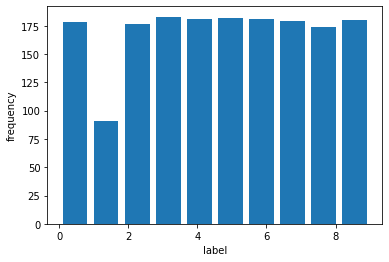

In [144]:
plt.hist (y_imba, rwidth = 0.8)
plt.xlabel ('label')
plt.ylabel('frequency')

In [145]:
#delete half of ones from x
X_imba = np.delete(X,idx_1[:len(idx_1)//2],0)

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    X_imba, y_imba, test_size=0.3, shuffle=True)



Choose a classifier:


In [147]:
model_imba = svm_classifier(X_train, y_train)



Now predict the value of the digit of the test dataset


In [148]:
predicted = model_imba.predict(X_test)

In [149]:
num_acc_imba = []

for i in range (10):
    #find the index of each number (0 to 9) in the label
    idx = np.where(y_test == i)
    num_acc_imba.append(metrics.accuracy_score(y_test[idx], predicted[idx]))

Plot the prediction accuracy for each label (0 to 9)

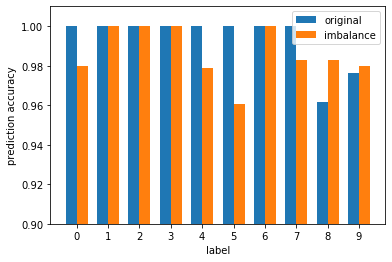

In [153]:
width = 0.35  # the width of the bars
plt.bar(np.arange(0,10,1)-width/2,num_acc,width, label = 'original')
plt.bar(np.arange(0,10,1)+width/2,num_acc_imba, width,label = 'imbalance')
plt.ylim(0.9,1.01)
plt.xticks(np.arange(0,10,1))
plt.xlabel ('label')
plt.ylabel('prediction accuracy')
plt.legend()